# Nested & Repeated Data
Se refiere a tipos de datos más complejos que los vistos hasta ahora (numéricos, strings, datetime).

## Nested
Este tipo de datos refiere, básicamente, a *STRUCT*, es decir, un variable que puede contener varios *campos* en su interior. Supongamo, para clarificar el concepto, un ejemplo donde se contiene información sobre "mascotas" y sus "juguetes". Si se desea organizar toda esta información en una sóla tabla, se deberá recurrir a *Nested data*, de la siguiente manera:
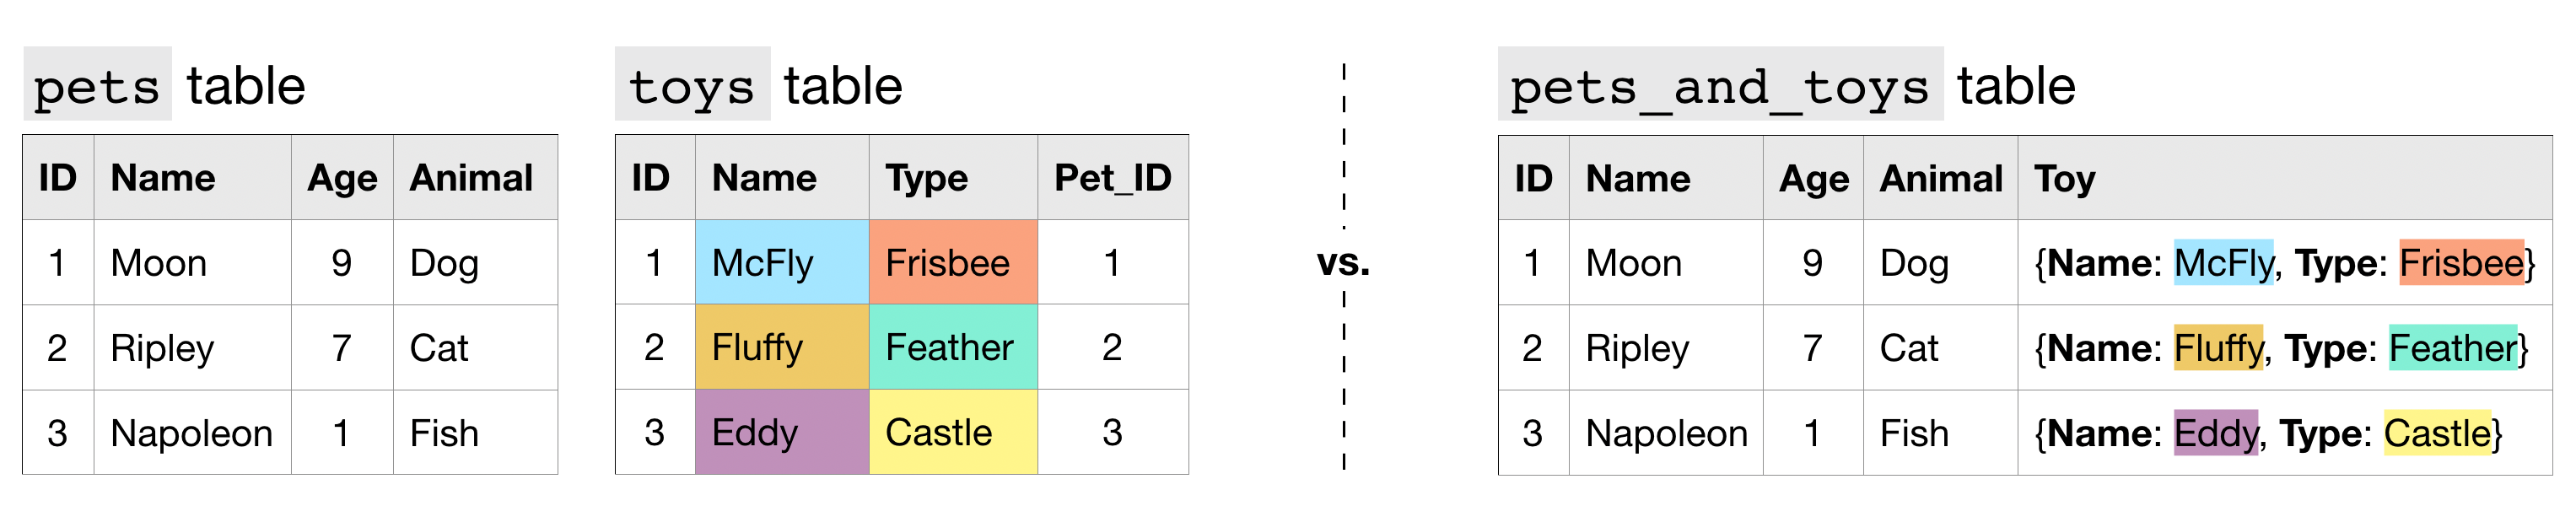

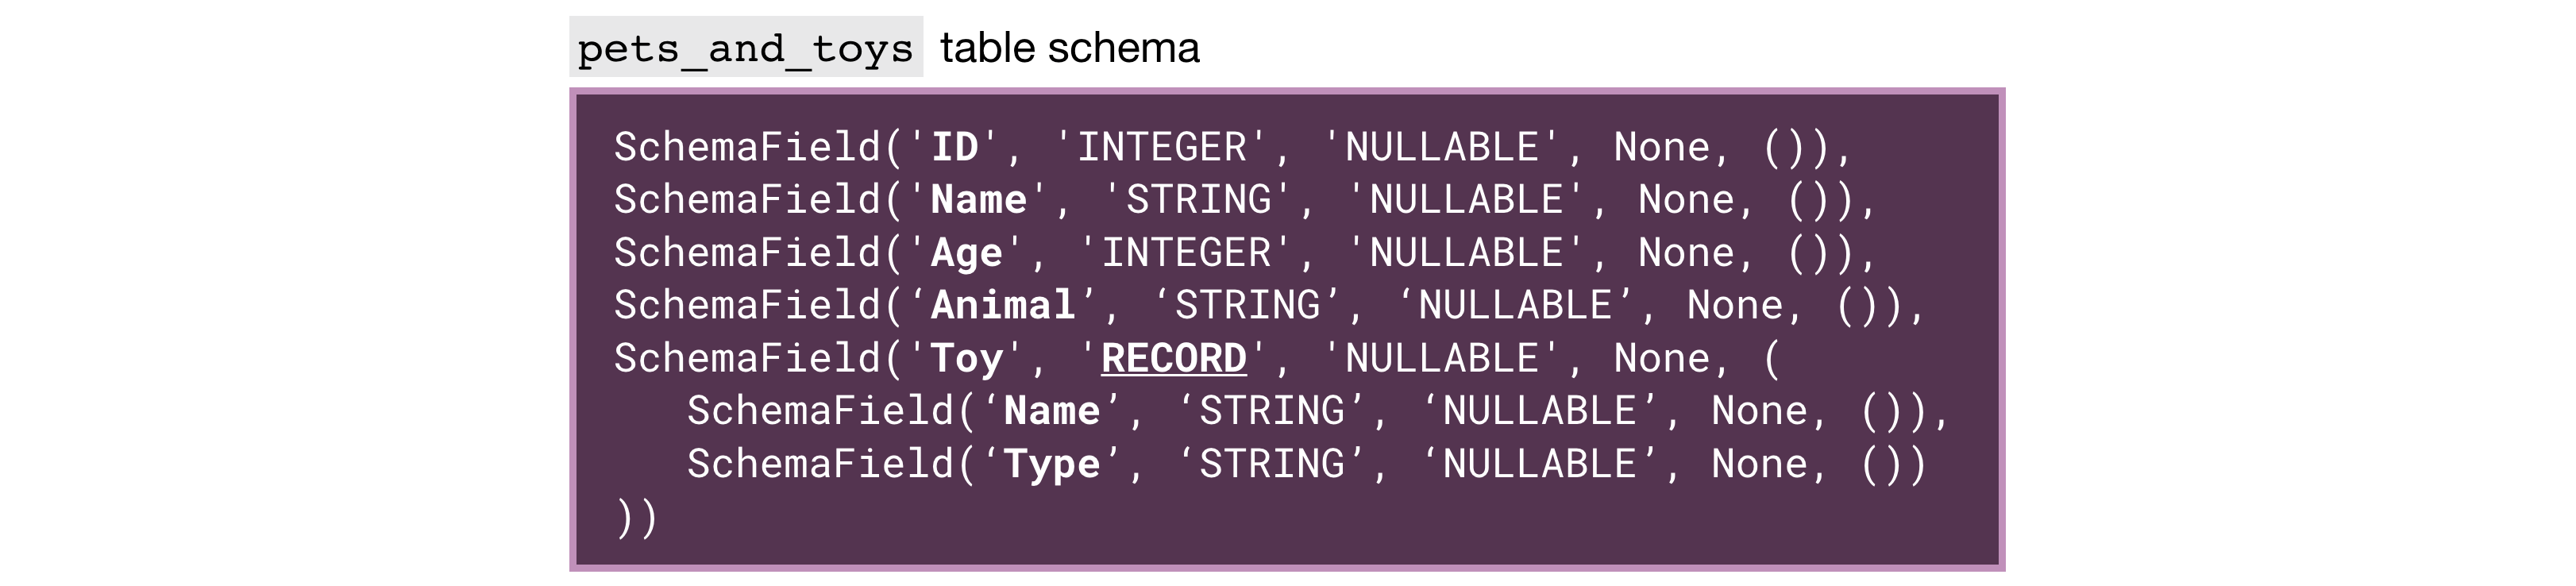

Se puede observar como toda la información correspondiente al "juguete" se colapsa en una sola columna (*Nested*).

Luego, para consultar una columna con este tipo de datos, sólo deberemos identificar cada campo de la misma:
- Toy.Type
- Toy.Name

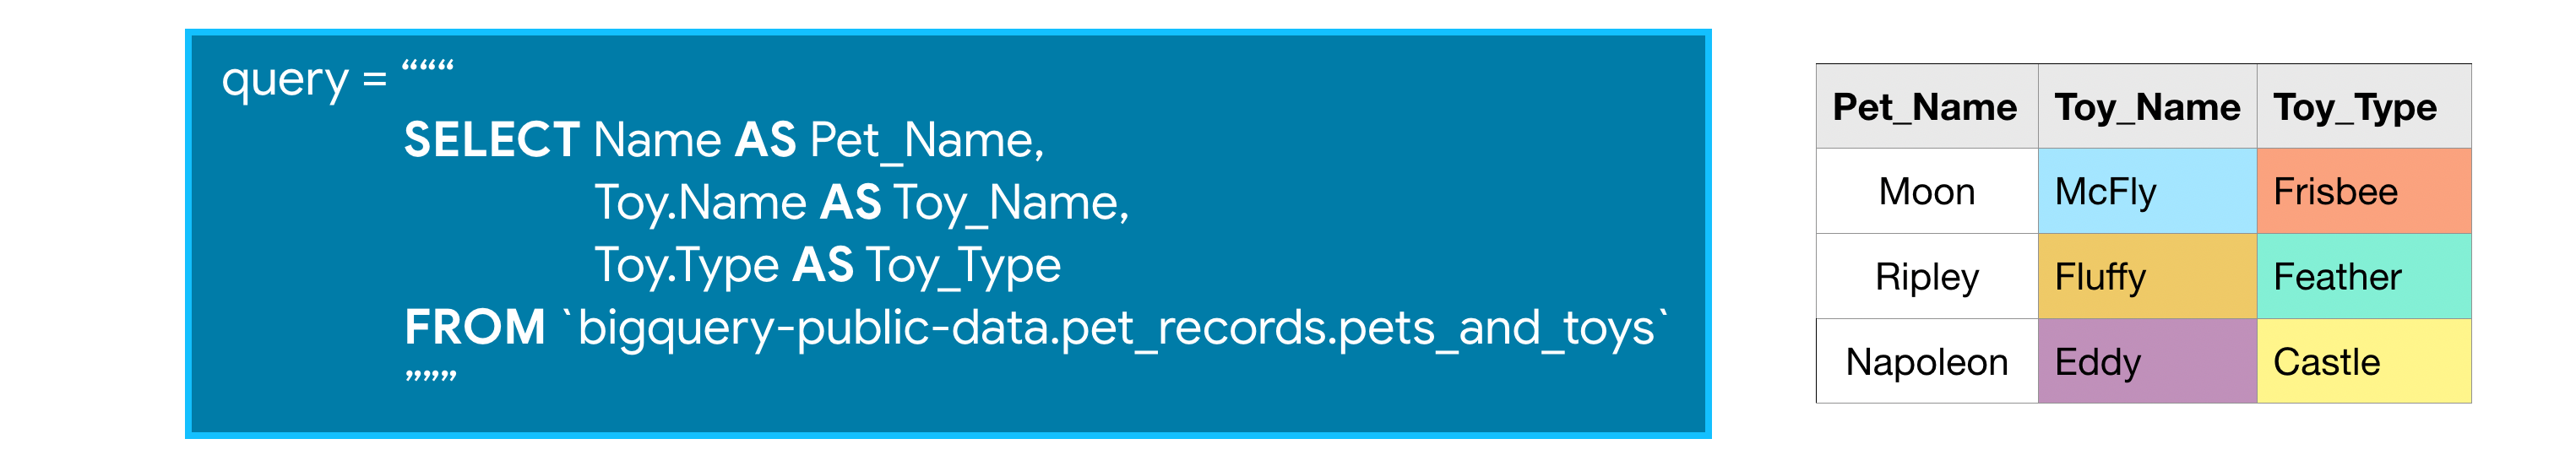

## Repeated
Este tipo de datos, por otro lado, refiere básicamente a *ARRAYS*. Supongamos un caso similar al anterior, donde cada "mascota", ahora, puede poseer varias "juguetes" (de variable simple Type, no *Nested* como antes).

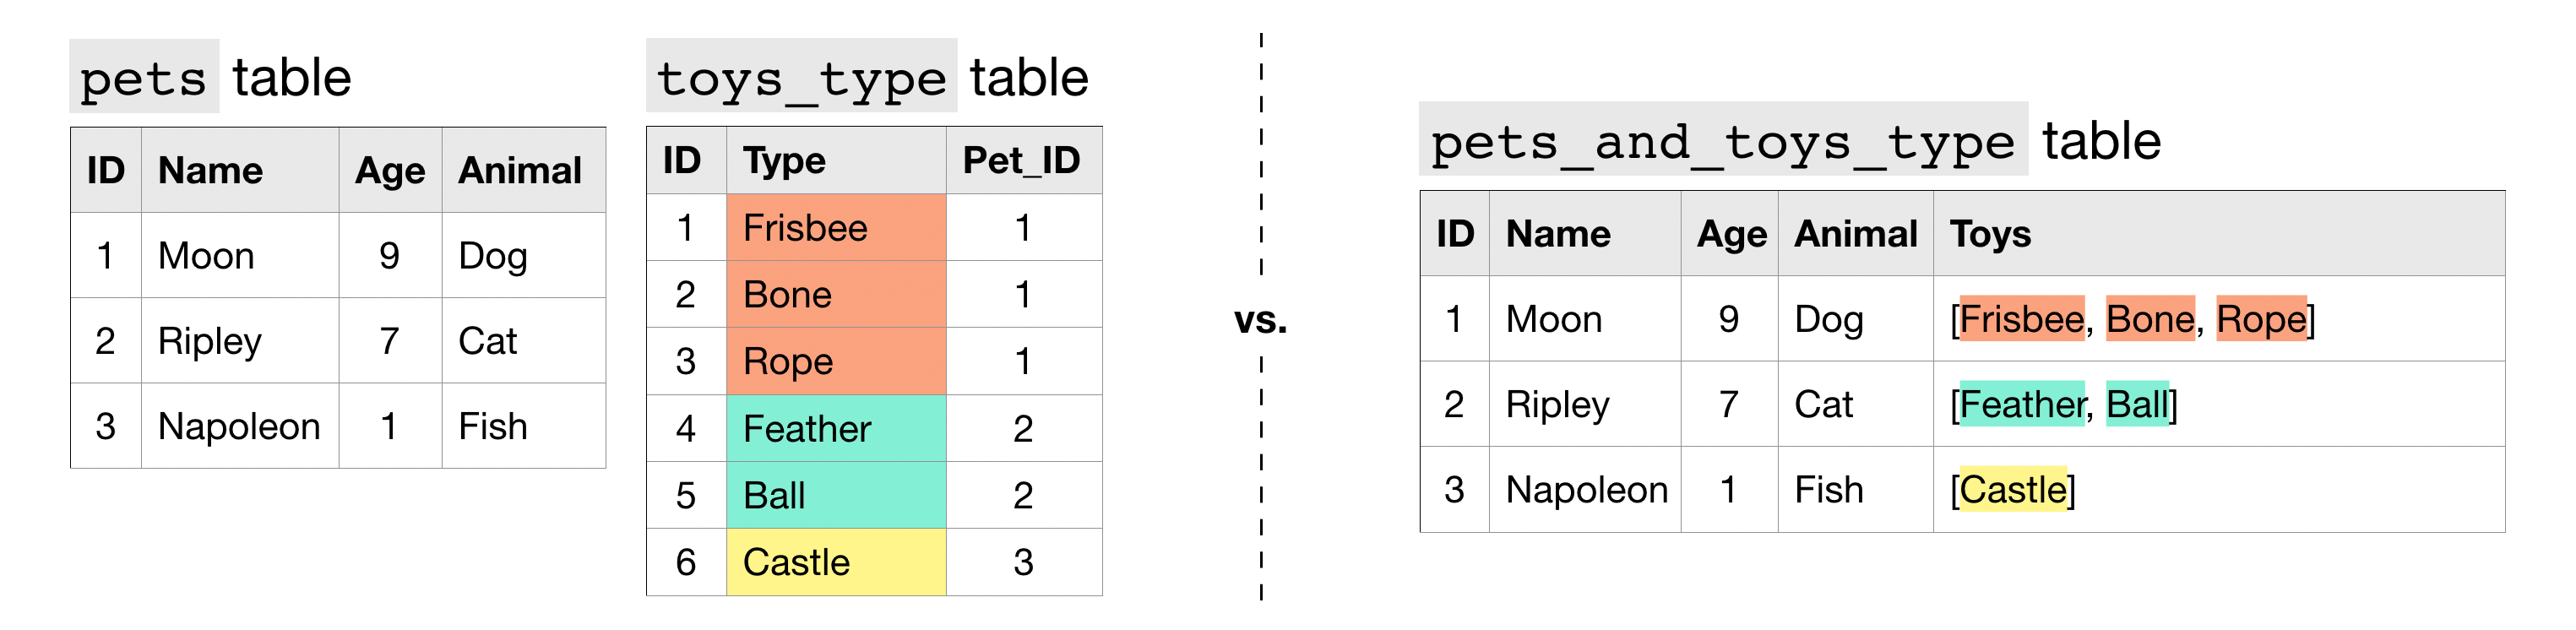

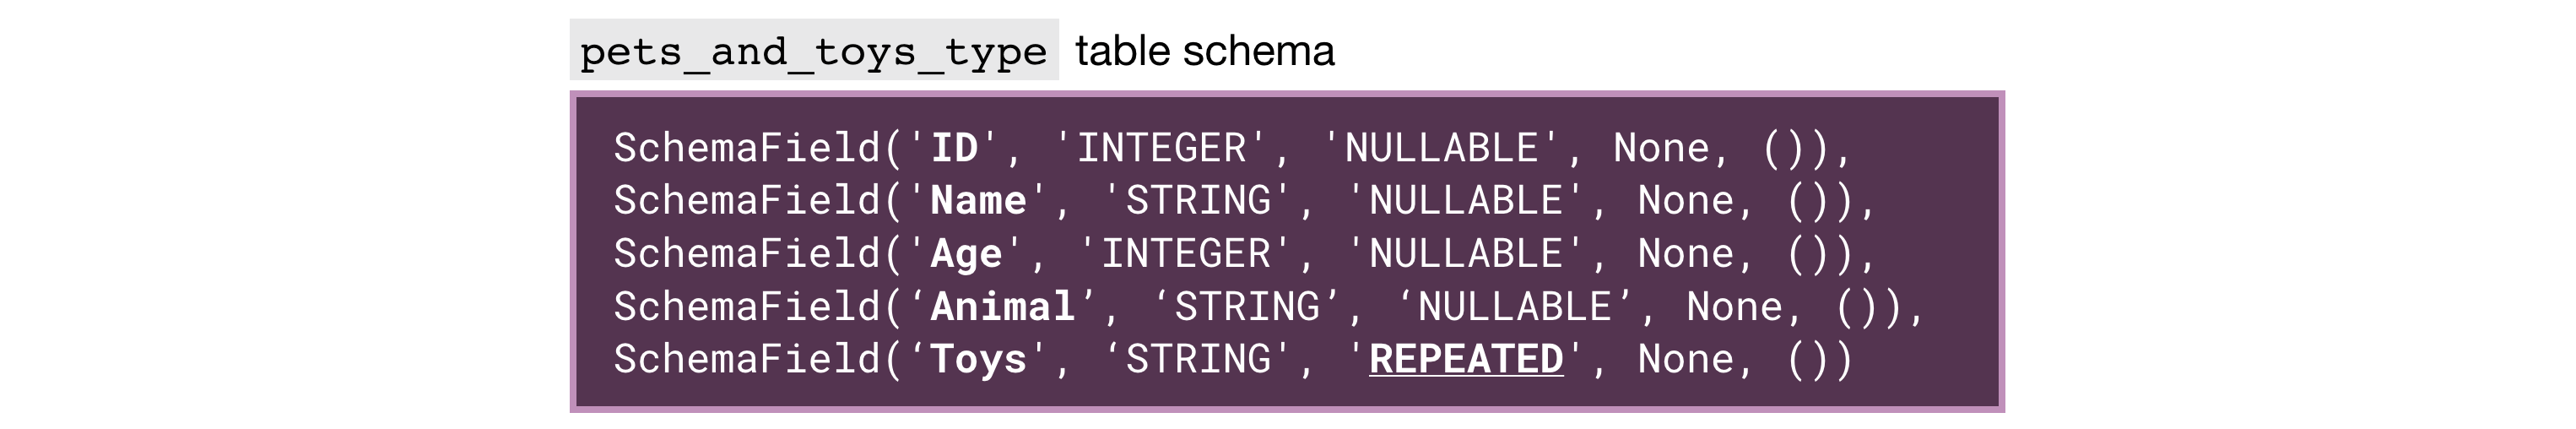

Para consultar una columna con *Repeated data* deberemos colocarla dentro de **UNNEST()**. Esto generará una nueva fila por cada valor dentro del *array*.

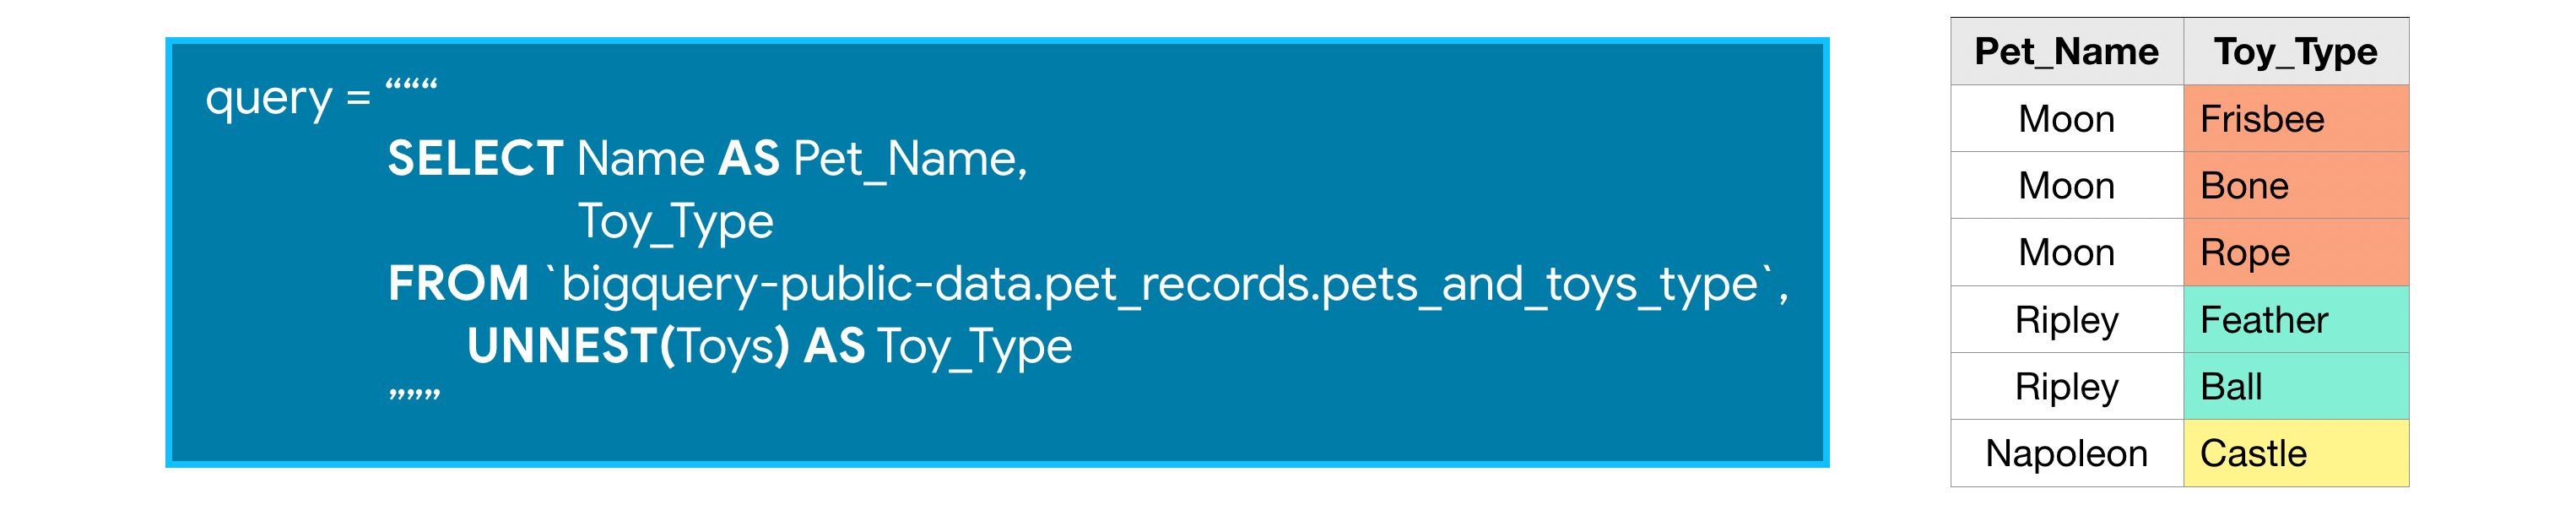

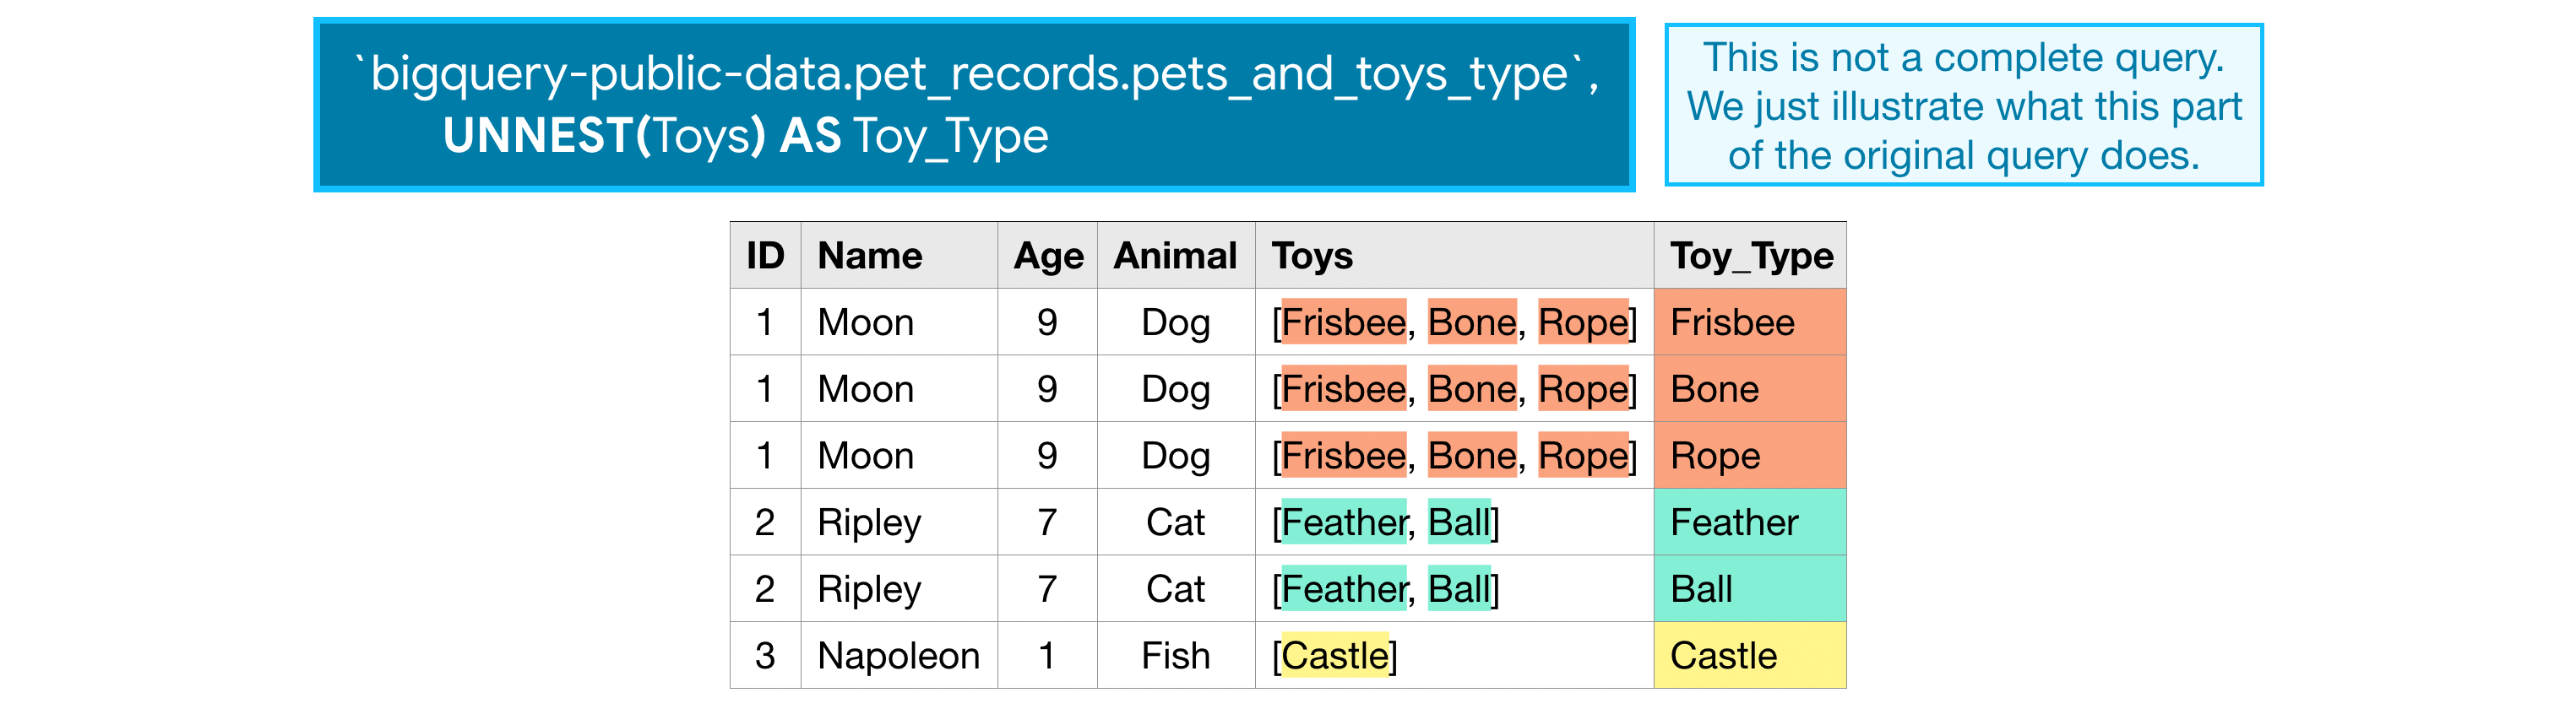

## Nested y Repeated Data
El último tipo que veremos es aquel en que se combinan los dos anteriores, donde una entrada puede tener varios valores y cada uno de ellos, poseer varios campos.

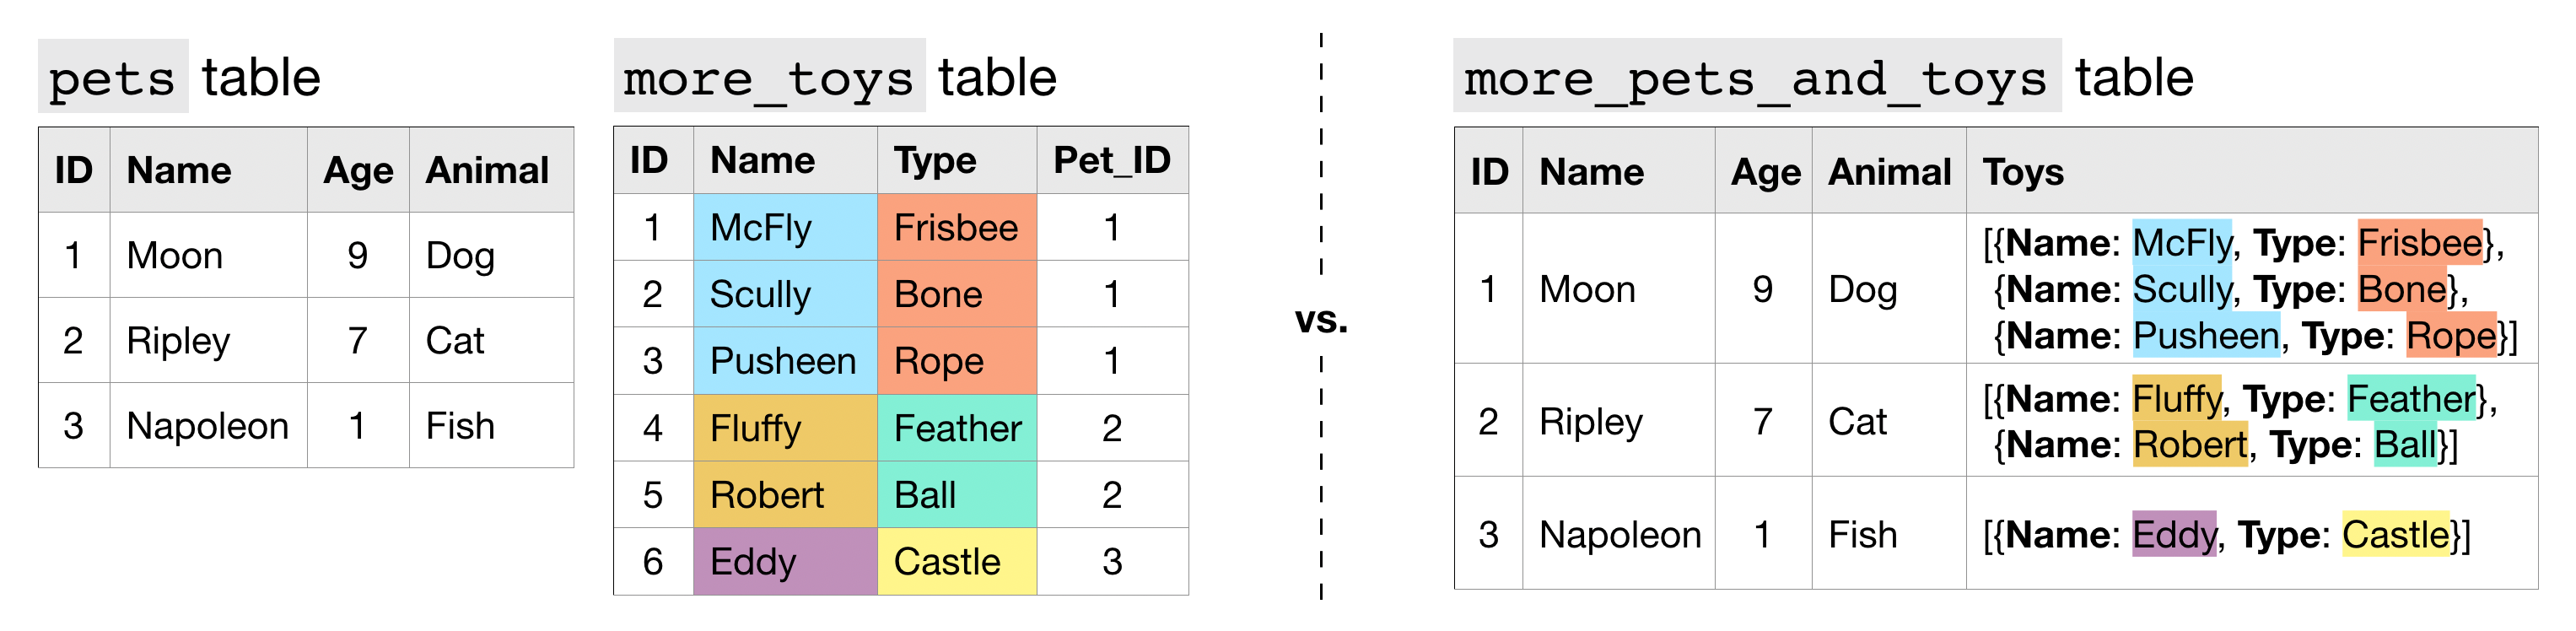

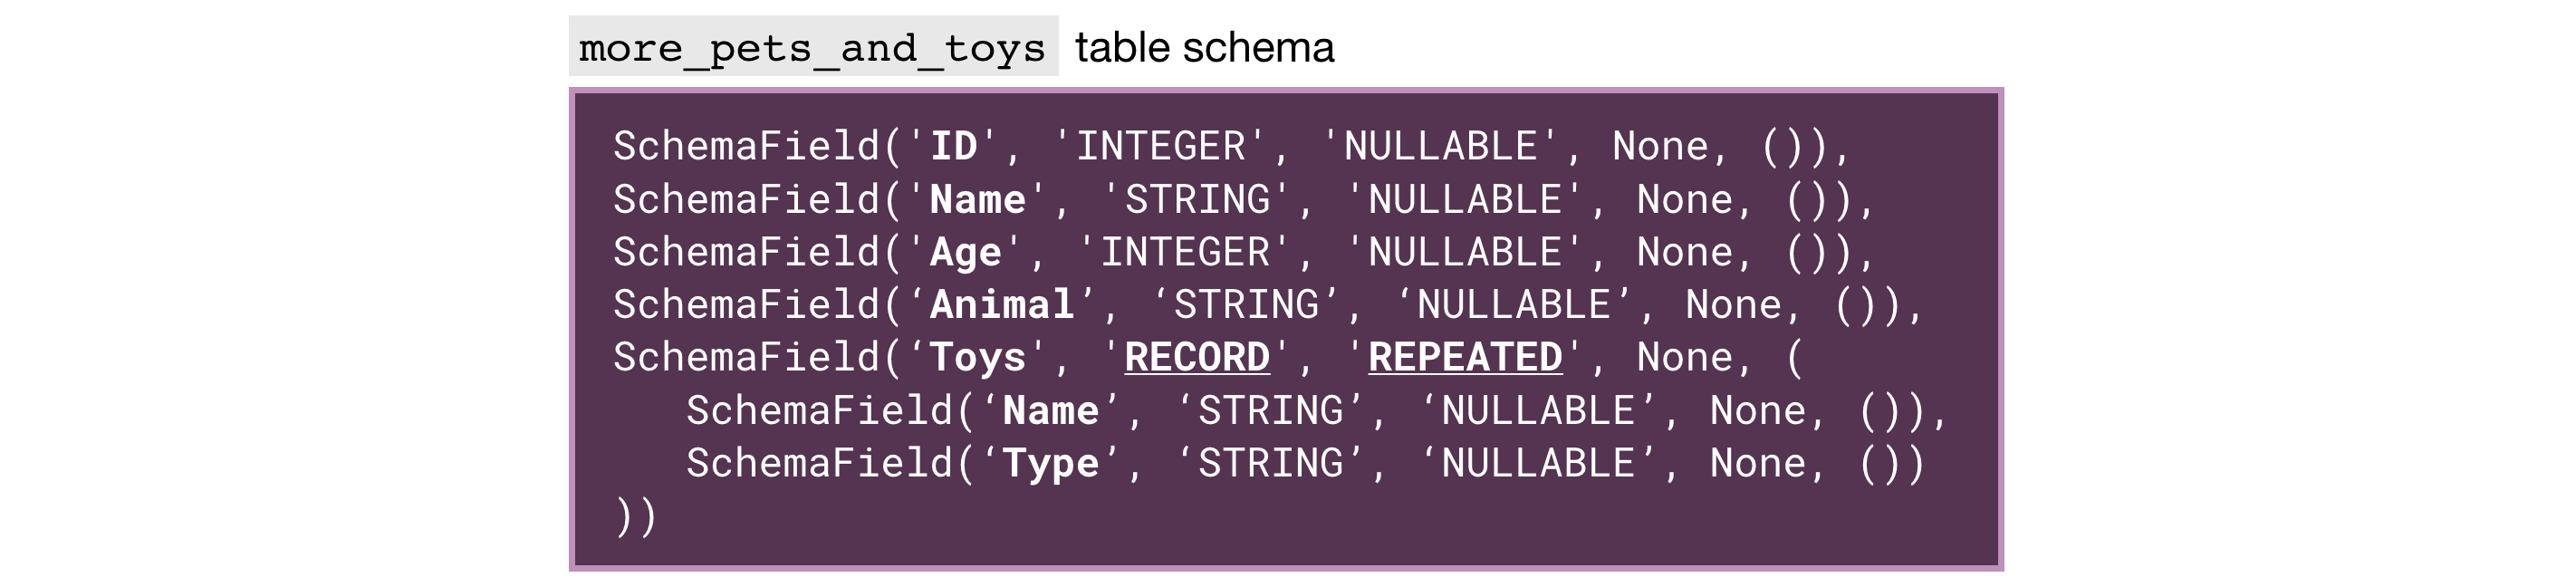

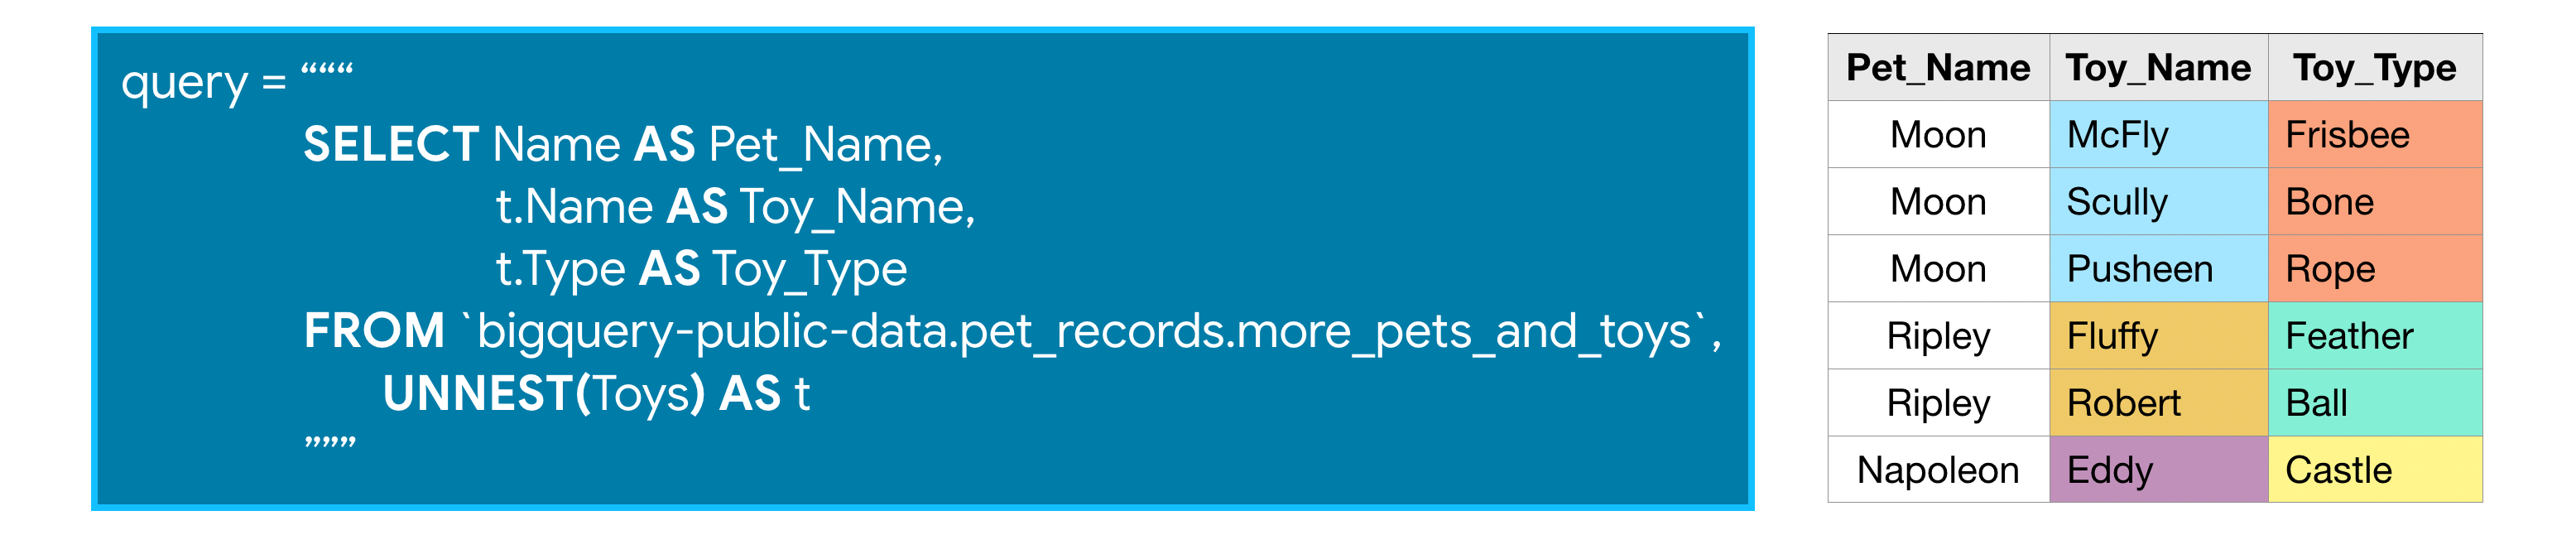

## Práctica
Para mejor comprensión de los temas aprendidos, realizaremos una práctica basándonos el *dataset "github_repos"*.

1. Utilizando la tala *sample_commits*, encontrar individuos que posean la mayor cantidad de "commits" en el año 2016.

In [1]:
from google.cloud import bigquery

client = bigquery.Client()
dataset_ref = client.dataset('github_repos', project='bigquery-public-data')
table_ref = dataset_ref.table('sample_commits')
commits_table = client.get_table(table_ref)

client.list_rows(commits_table, max_results=5).to_dataframe()

commit  \
0  3eca86e75ec7a7d4b9a9c8091b11676f7bd2a39f   
1  7158627686f02319c50c8d9d78f75d4c8d126ff2   
2  9732cafd9dc0206479be919baf0067239f0a63ca   
3  4702abd3f9728893ad5b0f4389e1902588510459   
4  57bd4b91a6cfc5bad4c5d829ef85293ea63643ea   

                                       tree  \
0  8e1b4380409a85a922ee0d3f622b5dd4d16bcfad   
1  3b4d781bd966f07cad1b67b137f0ff8b89430e9a   
2  c8878035ac9cb6dce592957f12dc1723a583989d   
3  32926e7c55ef585d9b9c174a0e5f9ed13ed6bf7e   
4  2ffc2066eb7638e185663e9d849663403229d4e5   

                                       parent  \
0  [104a0c02e8b1936c049e18a6d4e4ab040fb61213]   
1  [66aa8d6a145b6a66566b4fce219cc56c3d0e01c3]   
2  [f3c003f72dfb2497056bcbb864885837a1968ed5]   
3  [ddf28352b80c86754a6424e3a61e8bdf9213b3c7]   
4  [f74c95c20bad8e183e41283475f68a3e7b247af4]   

                                              author  \
0  {'name': 'Mark Rutland', 'email': '1db9dd262be...   
1  {'name': 'Will Deacon', 'email': 'b913f13ef92a...   
2  {'name': 'Jiang Liu', 'email': 'c745fa7b96fe79...   
3  {'name': 'Nicolas Pitre', 'email': '408789a210...   
4  {'name': 'Ben Dooks', 'email': '1177f64998f284...   

                                           committer  \
0  {'name': 'Catalin Marinas', 'email': '15ce75b2...   
1  {'name': 'Catalin Marinas', 'email': '15ce75b2...   
2  {'name': 'Catalin Marinas', 'email': '15ce75b2...   
3  {'name': 'Arnd Bergmann', 'email': 'f2c659f019...   
4  {'name': 'Ben Dooks', 'email': '1177f64998f284...   

                                             subject  \
0             arm64: Remove fixmap include fragility   
1  arm64: percpu: implement optimised pcpu access...   
2  arm64, jump label: optimize jump label impleme...   
3                           ARM: mach-nuc93x: delete   
4  [ARM] S3C24XX: Movev udc headers to arch/arm/p...   

                                             message  \
0  arm64: Remove fixmap include fragility\n\nThe ...   
1  arm64: percpu: implement optimised pcpu access...   
2  arm64, jump label: optimize jump label impleme...   
3  ARM: mach-nuc93x: delete\n\nThis architecture ...   
4  [ARM] S3C24XX: Movev udc headers to arch/arm/p...   

                                             trailer  \
0  [{'key': 'Signed-off-by', 'value': 'Mark Rutla...   
1  [{'key': 'Signed-off-by', 'value': 'Will Deaco...   
2  [{'key': 'Reviewed-by', 'value': 'Will Deacon ...   
3  [{'key': 'Signed-off-by', 'value': 'Nicolas Pi...   
4  [{'key': 'Signed-off-by', 'value': 'Ben Dooks ...   

                                          difference difference_truncated  \
0  [{'old_mode': 33188.0, 'new_mode': 33188.0, 'o...                 None   
1  [{'old_mode': 33188.0, 'new_mode': 33188.0, 'o...                 None   
2  [{'old_mode': 33188.0, 'new_mode': 33188.0, 'o...                 None   
3  [{'old_mode': 33188.0, 'new_mode': 33188.0, 'o...                 None   
4  [{'old_mode': 33188.0, 'new_mode': 33188.0, 'o...                 None   

        repo_name encoding  
0  torvalds/linux     None  
1  torvalds/linux     None  
2  torvalds/linux     None  
3  torvalds/linux     None  
4  torvalds/linux     None

In [6]:
most_commits_query = '''
SELECT committer.name AS committer_name,
       COUNT(*) AS num_commits
FROM `bigquery-public-data.github_repos.sample_commits`
WHERE EXTRACT(YEAR FROM committer.date) = 2016
GROUP BY committer_name
ORDER BY num_commits DESC
'''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
most_commits_query_job = client.query(most_commits_query, job_config=safe_config)

most_commits = most_commits_query_job.to_dataframe()
most_commits

committer_name  num_commits
0       Greg Kroah-Hartman         3545
1          David S. Miller         3120
2    TensorFlower Gardener         2449
3           Linus Torvalds         2424
4          Benjamin Pasero         1127
..                     ...          ...
748                 karczk            1
749              bugsfan45            1
750        Victor Homyakov            1
751           Alex Martini            1
752                Singlet            1

[753 rows x 2 columns]

**2. Se desea conocer cuál es el lenguaje de programación más popular. Utilizar la tabla *languages* y devolver por cada lenguaje la cantida de repositorios en los que aparece.**

In [9]:
table_ref = dataset_ref.table('languages')
languages_table = client.get_table(table_ref)

client.list_rows(languages_table, max_results=5).to_dataframe()

repo_name                         language
0  Coldsp33d/sudoku-with-c   [{'name': 'C', 'bytes': 1215}]
1     d-torrance/wmmemload  [{'name': 'C', 'bytes': 38492}]
2      carlmartus/Epicfail   [{'name': 'C', 'bytes': 9955}]
3       joubu/BalancingBar  [{'name': 'C', 'bytes': 87403}]
4       Funcke/filechecker   [{'name': 'C', 'bytes': 3325}]

In [12]:
popular_languages_query = '''
SELECT lang.name AS language_name,
       COUNT(*) AS num_repos
FROM `bigquery-public-data.github_repos.languages`,
    UNNEST(language) AS lang
GROUP BY language_name
ORDER BY num_repos DESC
'''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
popular_languages_query_job = client.query(popular_languages_query, job_config=safe_config)

popular_languages = popular_languages_query_job.to_dataframe()
popular_languages

language_name  num_repos
0         JavaScript    1099877
1                CSS     810697
2               HTML     778092
3              Shell     638521
4             Python     549091
..               ...        ...
459              Org          1
460               Q#          1
461              INI          1
462            Dafny          1
463  KiCad Schematic          1

[464 rows x 2 columns]

**3. ¿Qué lenguajes son utilizados en el repositorio con mayor cantidad de lenguajes ("polyrabbit/polyglot")?**

In [15]:
languages_poly_query = '''
SELECT lang.name AS language_name,
       lang.bytes AS num_bytes
FROM `bigquery-public-data.github_repos.languages`,
    UNNEST(language) AS lang
WHERE repo_name = "polyrabbit/polyglot"
ORDER BY num_bytes DESC
'''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
languages_poly_query_job = client.query(languages_poly_query, job_config=safe_config)

languages_poly = languages_poly_query_job.to_dataframe()
languages_poly

language_name  num_bytes
0                  Lasso     834726
1                      C     819142
2                Mercury     709952
3            Objective-C     495392
4    Game Maker Language     298131
..                   ...        ...
211                   XC         82
212              Arduino         81
213               Nimrod         43
214           AutoHotkey         23
215                  Tea         20

[216 rows x 2 columns]